In [44]:
# Put these at the top of every notebook, to get automatic reloading , inline plotting and intellisense  
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config IPCompleter.greedy=True

In [45]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data/ice_field_hockey/"
sz=224

In [6]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.1, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.81109    0.157821   1.0       
    1      0.409825   0.029842   1.0            
    2      0.277807   0.017688   1.0             



[0.017687779, 1.0]

In [7]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
data.classes


['field', 'ice']

In [9]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(22, 2)

In [10]:
log_preds

array([[ -0.00007,  -9.52027],
       [ -0.00073,  -7.22402],
       [ -0.0041 ,  -5.49981],
       [ -0.3128 ,  -1.31452],
       [ -0.00023,  -8.38515],
       [ -0.00034,  -7.9884 ],
       [ -0.00034,  -7.99456],
       [ -0.00054,  -7.53362],
       [ -0.0531 ,  -2.96207],
       [ -0.00008,  -9.47316],
       [ -6.48072,  -0.00153],
       [ -7.75033,  -0.00043],
       [ -8.39827,  -0.00023],
       [ -5.40912,  -0.00449],
       [ -5.53349,  -0.00396],
       [ -5.53349,  -0.00396],
       [-10.64413,  -0.00002],
       [ -7.97287,  -0.00034],
       [ -6.74701,  -0.00118],
       [ -9.28192,  -0.00009],
       [ -7.55797,  -0.00052],
       [ -9.61234,  -0.00007]], dtype=float32)

In [18]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,0])        # pr(field)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
def rand_by_mask(mask): 
    print(mask)
    print(np.where(mask)[0])
    return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): 
    return rand_by_mask((preds == data.val_y)==is_correct)

In [40]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [41]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [42]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

[ True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Correctly classified


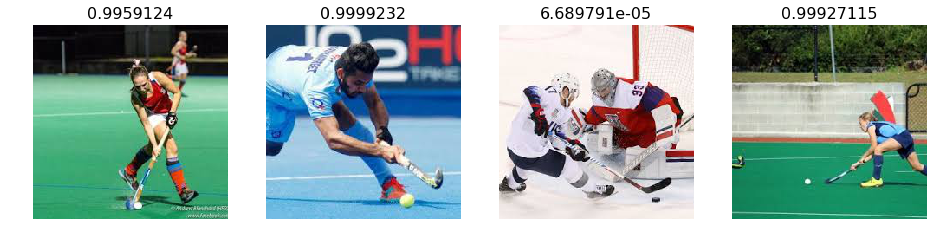

In [43]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")